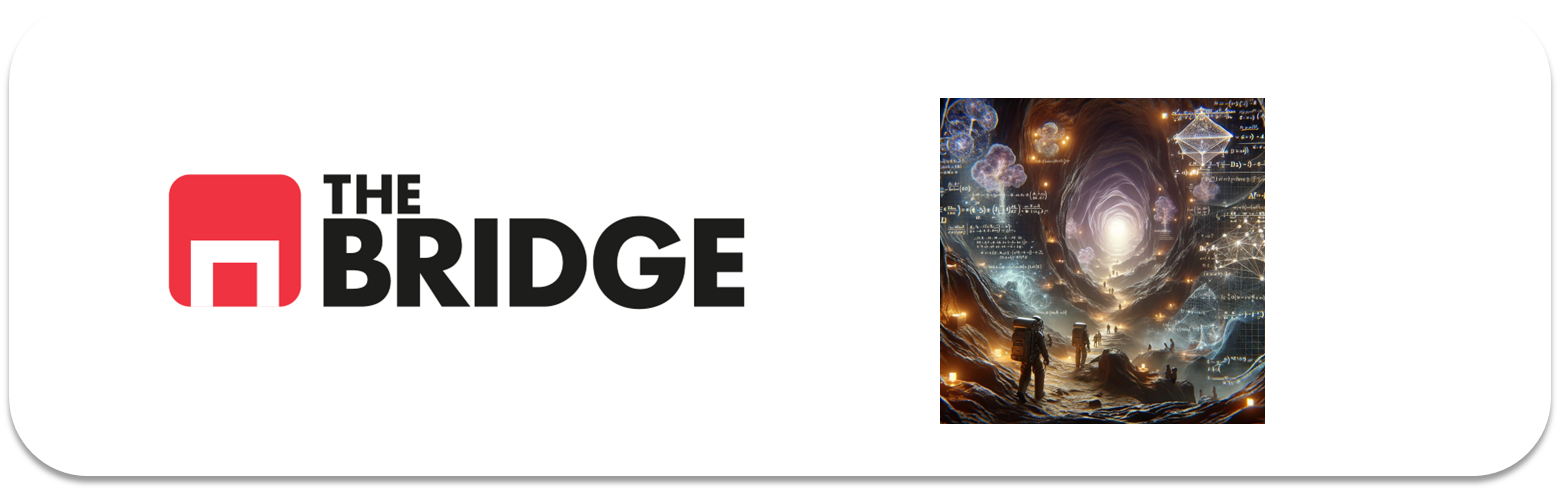

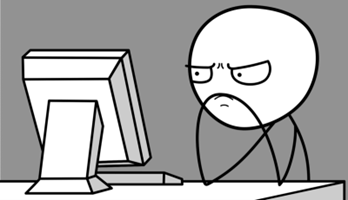

Para ejercitarte y afianzar lo aprendido sobre nuestra **Introducción a Deep Learning**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Bank marketing dataset - Depósito a plazo fijo

En este notebook vamos repasar un modelo que ya hicimos en anteriores ocasiones que nos permitía predecir si un individuo dependiendo de sus características, así como características de la campaña de marketing a la cual se pretende asignarlo, va a adquirir un servicio bancario (en este caso, un depósito a plazo fijo). El objetivo de este ejercicio será, mas allá de obtener un modelo preciso o hacer un análisis de datos exhaustivo, observar las posibles diferencias entre el utilizar un modelo de regresión logística o uno de MLP (multi-layer perceptron) para predecir nuestra variable categórica (sí adquiere, no adquiere).

Obtenemos los datos a partir del "*UCI Machine Learning repository*".

### *Features*:

#### Datos del cliente:

1. **age** (edad)
2. **job** (tipo de trabajo)
3. **marital** (estado marital)
4. **education** (nivel de eduación)
5. **default** (fallo en pagar una deuda)
6. **housing** (si tiene un préstamo de vivienda)
7. **loan** (si tiene un préstamo personal)
8. **balance** (balance personal)

#### Datos del último contacto de la campaña de marketing en curso:

9. **contact** (tipo de contacto)
10. **month** (último mes de contacto)
11. **day** (último día de contacto)
12. **duration** (duración de la llamada en segundos; duration = 0 significa no contactados)

#### Otros

13. **campaign** (número de contactos al cliente hechos en esta campaña)
14. **pdays** (número de días que han pasado desde que el cliente fue contactado en una campaña anterior; 999 o -1 significa que el cliente no ha sido contactado)
15. **previous** (número de contactos realizados antes de esta campaña a el cliente)
16. **poutcome** (resultado de la campaña anterior)
17. **deposit** (target)

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

### Ejercicios 1

Importa los datos y echa un vistazo rápido. Selecciona la variable target y asignala a una variable "target".

In [2]:
df = pd.read_csv('data/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
target = "deposit"

### Ejercicio 2

Haz el split en train y test y analiza el target.

In [ ]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
# Analizar distribución de la variable target en train
print(train_set[target].value_counts(normalize=True))
print(test_set[target].value_counts(normalize=True))

deposit
no     0.527159
yes    0.472841
Name: proportion, dtype: float64
deposit
no     0.522167
yes    0.477833
Name: proportion, dtype: float64


El dataset está bastante balanceado, no hace falta hacer técnicas de balanceo.

### Ejercicio 3

Tienes múltiples variables tipo object y algunas numéricas, en este caso quédate solo con las variables numéricas y el target. Observa las distribuciones de dichas variables numéricas

Variables numéricas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


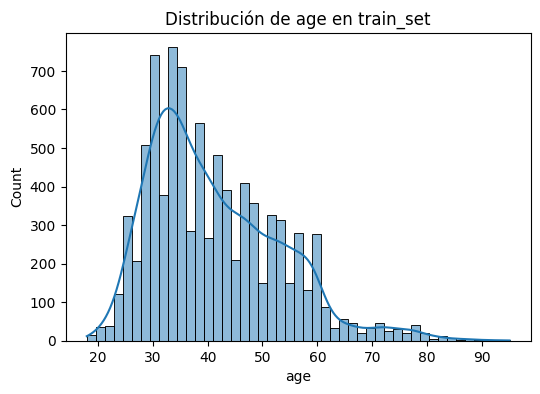

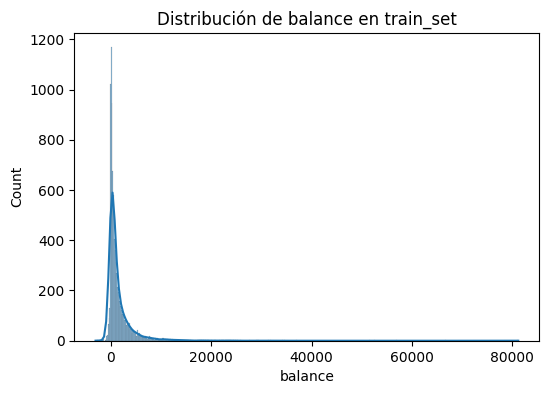

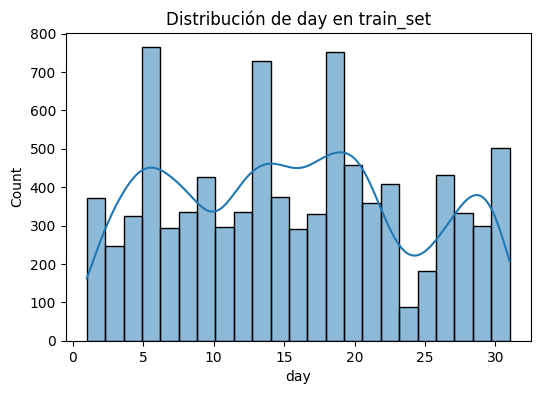

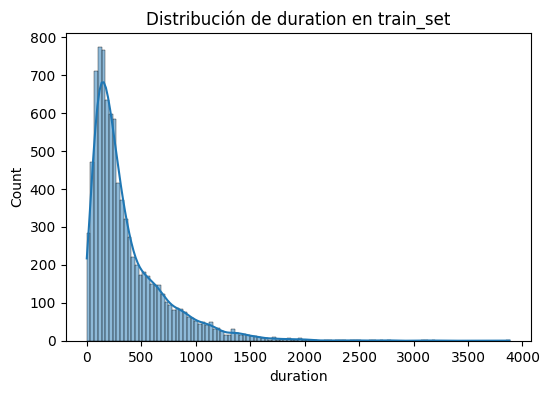

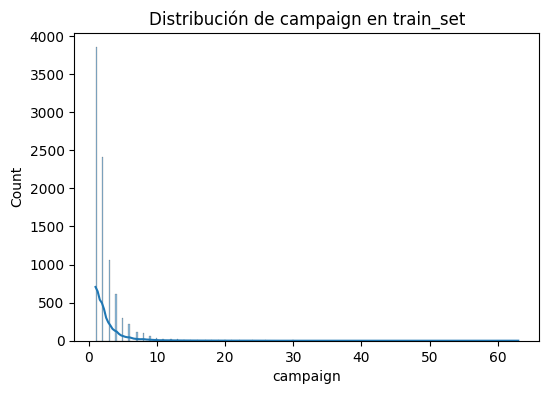

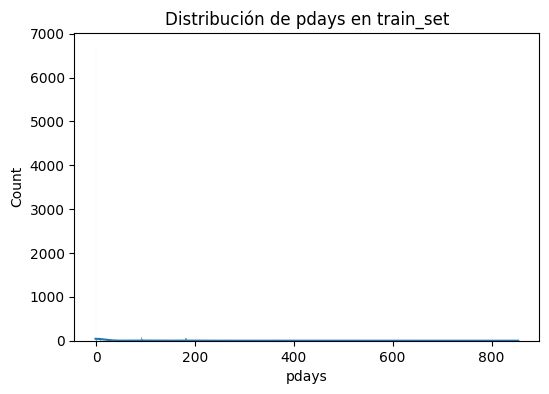

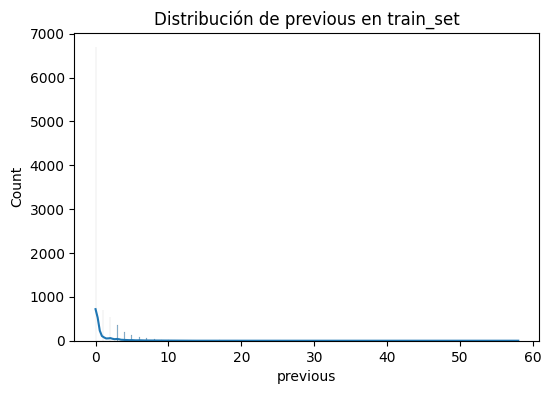

In [7]:
# Seleccionar solo variables numéricas 
num_cols = df.select_dtypes(include=['int64']).columns.tolist()
print('Variables numéricas:', num_cols)

# Visualizar distribuciones en TRAIN SET 
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_set[col], kde=True)
    plt.title(f'Distribución de {col} en train_set')
    plt.show()



- age → Distribución sesgada a la izquierda; mayoría entre 30–40 años.
- balance → Distribución muy sesgada a la derecha; muchos con balance bajo, algunos con valores extremos (outliers grandes, >40.000).
- day → Distribución bastante uniforme (es el día del mes).
- duration → Sesgo a la derecha; mayoría de llamadas cortas, pocos casos con llamadas largas.
- campaign → Sesgo a la derecha; la mayoría de los clientes fueron contactados pocas veces, algunos muchos (>50).
- pdays → Prácticamente todo está en 999, indicando “nunca contactado antes”.
- previous → Casi todo en 0; pocos con contactos anteriores.

### Ejercicio 4

A partir de las features del ejercicio 3, realiza una selección de features sencilla, utiliza la técnica que consideres conveniente y quedate con 4 features.

In [8]:
# Mapear target a binario
train_num = train_set.copy()
train_num['deposit_bin'] = train_num['deposit'].map({'yes': 1, 'no': 0})

In [9]:
# Calcular correlación
correlations = train_num[num_cols + ['deposit_bin']].corr()['deposit_bin'].abs().sort_values(ascending=False)
print(correlations)

deposit_bin    1.000000
duration       0.455134
pdays          0.152436
previous       0.141661
campaign       0.126892
balance        0.072000
day            0.051525
age            0.031209
Name: deposit_bin, dtype: float64


In [10]:
selected_features = ['duration', 'pdays', 'previous', 'campaign']

### Ejercicio 5

Crea los pares X,y para train y test y escala los datos. ¿Por qué debemos hacerlo?

In [11]:
# Crear X e y para train y test
X_train = train_set[selected_features]
y_train = train_set['deposit'].map({'yes': 1, 'no': 0})

X_test = test_set[selected_features]
y_test = test_set['deposit'].map({'yes': 1, 'no': 0})

In [12]:
# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Lo hacemos porque modelos como MLPClassifier son sensibles a la magnitud de los datos. Si hay una feature con rango [0,1] y otra con [0,10000], la segunda es la que prevalece. Al escalar, todas las features contribuyen por igual. 

### Ejercicio 6

 Crea un modelo de regresión logistica y observa sus métricas. Además, registra su tiempo de entrenamiento y de predicciones

In [13]:
# Inicializar modelo
logreg = LogisticRegression(random_state=42)

# Registrar tiempo de entrenamiento
start_train = time.time()
logreg.fit(X_train_scaled, y_train)
end_train = time.time()
train_time = end_train - start_train

# Registrar tiempo de predicción
start_pred = time.time()
y_pred = logreg.predict(X_test_scaled)
end_pred = time.time()
pred_time = end_pred - start_pred

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Mostrar resultados
print(f"Tiempo de entrenamiento: {train_time:.4f} segundos")
print(f"Tiempo de predicción: {pred_time:.4f} segundos")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Tiempo de entrenamiento: 0.0139 segundos
Tiempo de predicción: 0.0000 segundos
Accuracy: 0.7425
Precision: 0.7600
Recall: 0.6739


El modelo acierta 74% de casos totales. De todos los que predice como "yes", acierta un 76%. De todos los que realmente eran "yes", detecta 67%. Modelo decente, pero se podría mejorar.

### Ejercicio 7

Crea un modelo MLP, con sklearn, con dos hidden layers de 100 neuronas c/u y observa sus métricas. Además, registra su tiempo de entrenamiento y de predicciones

In [14]:
# Inicializar modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, random_state=42)

# Registrar tiempo de entrenamiento
start_train = time.time()
mlp.fit(X_train_scaled, y_train)
end_train = time.time()
train_time = end_train - start_train

# Registrar tiempo de predicción
start_pred = time.time()
y_pred_mlp = mlp.predict(X_test_scaled)
end_pred = time.time()
pred_time = end_pred - start_pred

# Calcular métricas
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)

# Mostrar resultados
print(f"Tiempo de entrenamiento: {train_time:.4f} segundos")
print(f"Tiempo de predicción: {pred_time:.4f} segundos")
print(f"Accuracy: {accuracy_mlp:.4f}")
print(f"Precision: {precision_mlp:.4f}")
print(f"Recall: {recall_mlp:.4f}")

Tiempo de entrenamiento: 2.8004 segundos
Tiempo de predicción: 0.0043 segundos
Accuracy: 0.7667
Precision: 0.7703
Recall: 0.7291


El MLP mejora en todo, un poco mayor el tiempo de entrenamiento, pero razonable. 

### Ejercicio 8

Compara los dos modelos. En un caso real, ¿Con cuál modelo te quedarías? ¿Por qué?

### Comparación de modelos

| Aspecto                 | Logistic Regression             | MLP (2 capas, 100 neuronas c/u)    |
|-------------------------|---------------------------------|-------------------------------------|
| Accuracy               | 74.3%                          | 76.7%                              |
| Precision              | 76.0%                          | 77.0%                              |
| Recall                 | 67.4%                          | 72.9%                              |
| Tiempo de entrenamiento| ~0.014 s                       | ~2.8 s                             |
| Tiempo de predicción   | ~0.0000 s                      | ~0.0043 s                          |
| Interpretabilidad      | Alta (coeficientes claros)      | Baja (caja negra, difícil de interpretar) |
| Complejidad            | Baja                           | Media-alta                         |

### Elección del modelo

En un caso real, me quedaría con el modelo MLP porque ofrece mejores métricas de rendimiento, especialmente en recall, lo que significa que es capaz de detectar más casos positivos (clientes que contratarán el depósito a plazo fijo). Esto puede tener un impacto importante en términos de negocio, ya que permite optimizar campañas de marketing y reducir la pérdida de clientes potenciales.

Aunque el modelo MLP tiene un tiempo de entrenamiento superior y menor interpretabilidad, estas desventajas son asumibles dado el tamaño del dataset y el objetivo del problema. Por otro lado, si el contexto exigiera interpretabilidad (por ejemplo, por requisitos regulatorios o para explicar las decisiones del modelo a un equipo no técnico), entonces optaría por la regresión logística, que aunque tiene un rendimiento ligeramente inferior, es más simple y transparente.